In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2 as cv
import os
import random
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense ,Input, Flatten, Conv2D , Softmax, MaxPooling2D, Add, Dropout
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
folder = r"C:\Users\habib\Desktop\UNI\Neural Networks\data\train"
x_train = []
category = ['cat' , 'dog']

for c in category:
    path = os.path.join(folder,c)
    print(path)
    
    class_num = category.index(c)
    for img in os.listdir(path):
        array = cv.imread(os.path.join(path,img), cv.IMREAD_GRAYSCALE)
        array = cv.resize(array , (128,128))
        x_train.append([array,class_num])
    print("done")
        

C:\Users\habib\Desktop\UNI\Neural Networks\data\train\cat
done
C:\Users\habib\Desktop\UNI\Neural Networks\data\train\dog
done


In [3]:
random.shuffle(x_train)

In [4]:
X_train = []
Y_train = []
for x , y in x_train:
    X_train.append(x)
    Y_train.append(y)
    
X_train = np.array(X_train).reshape(-1 , 128,128)
Y_train = np.array(Y_train)

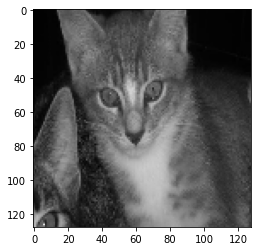

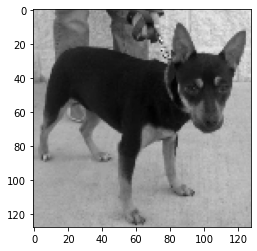

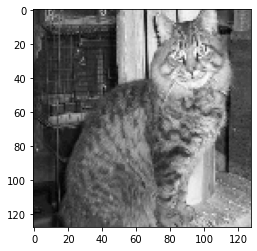

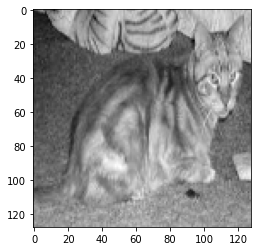

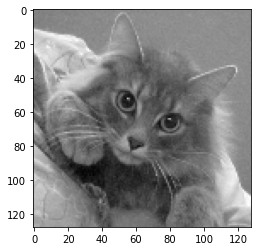

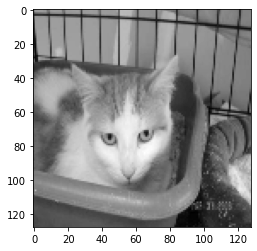

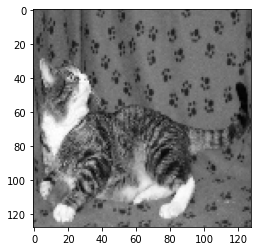

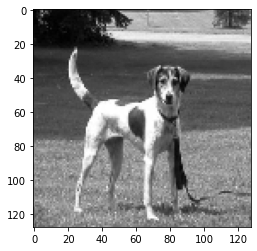

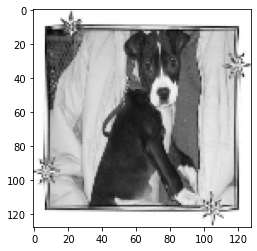

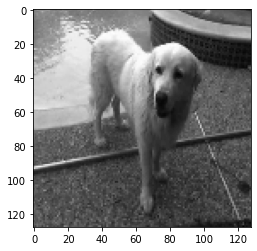

In [5]:
for i in range(10):
    plt.imshow(X_train[i] , cmap = "gray")
    plt.show()

In [6]:
X_train.shape

(25000, 128, 128)

In [7]:
#building the model

model =Sequential([
    Conv2D(filters = 16, kernel_size =(5,5), activation = 'relu', input_shape =(128, 128,1)),
    MaxPooling2D(pool_size = (2,2)),
    Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'),
    MaxPooling2D(pool_size = (2,2)),
    Conv2D(filters = 64, kernel_size = (1,1), activation = 'relu'),
    MaxPooling2D(pool_size = (2,2)),
    Flatten(),
    Dense(128,activation = 'relu'),
    Dropout(0.5),
    Dense(64,activation = 'relu'),
    Dropout(0.25),
    Dense(1,activation = 'sigmoid')
    
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 16)      416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 30, 64)        2112      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 64)       0

In [8]:
model.compile(optimizer = 'adam' , loss = "binary_crossentropy", metrics=["accuracy"])

model.fit(X_train,Y_train,epochs = 20 ,batch_size = 80)

Epoch 1/20
313/313 [==============================] - 56s 172ms/step - loss: 1.1080 - accuracy: 0.5178
Epoch 2/20
313/313 [==============================] - 56s 178ms/step - loss: 0.6618 - accuracy: 0.5764
Epoch 3/20
313/313 [==============================] - 53s 171ms/step - loss: 0.6169 - accuracy: 0.6692
Epoch 4/20
313/313 [==============================] - 54s 173ms/step - loss: 0.5714 - accuracy: 0.7124
Epoch 5/20
313/313 [==============================] - 56s 180ms/step - loss: 0.5390 - accuracy: 0.7346
Epoch 6/20
313/313 [==============================] - 54s 173ms/step - loss: 0.5153 - accuracy: 0.7496
Epoch 7/20
313/313 [==============================] - 54s 172ms/step - loss: 0.4924 - accuracy: 0.7664
Epoch 8/20
313/313 [==============================] - 55s 175ms/step - loss: 0.4629 - accuracy: 0.7849
Epoch 9/20
313/313 [==============================] - 55s 176ms/step - loss: 0.4491 - accuracy: 0.7950
Epoch 10/20
313/313 [==============================] - 55s 177ms/step - l

In [10]:
train_loss,train_acc = model.evaluate(X_train,Y_train,verbose = 2)

782/782 - 14s - loss: 0.2446 - accuracy: 0.9101 - 14s/epoch - 18ms/step


In [14]:
folder = r"C:\Users\habib\Desktop\UNI\Neural Networks\data\test1"
x_test = []

for img in os.listdir(folder):
    
    array = cv.imread(os.path.join(folder,img), cv.IMREAD_GRAYSCALE)
    array = cv.resize(array , (128,128))
    x_test.append(array)
print("done")

done


In [18]:
x_test = np.array(x_test).reshape(-1 , 128,128)
prediction = model.predict(x_test)

391/391 [==============================] - 7s 18ms/step


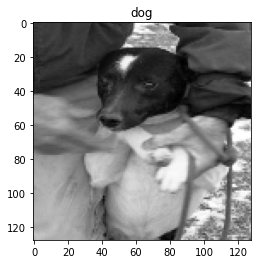

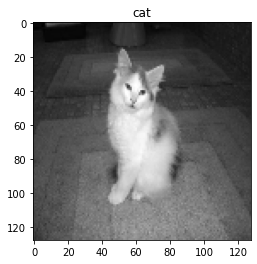

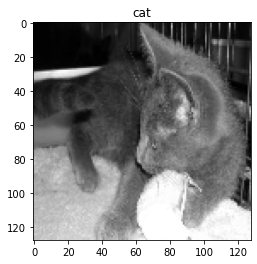

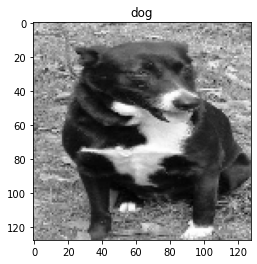

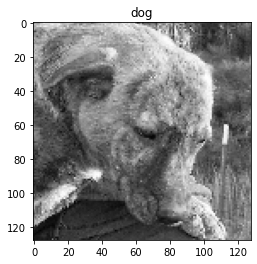

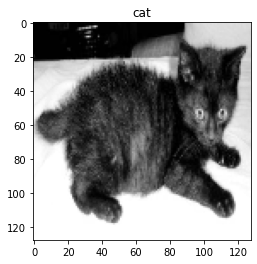

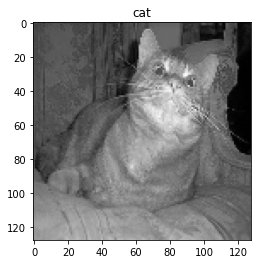

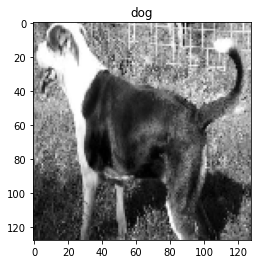

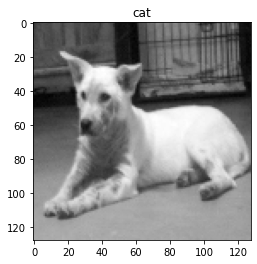

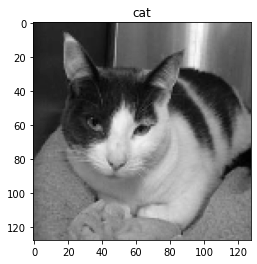

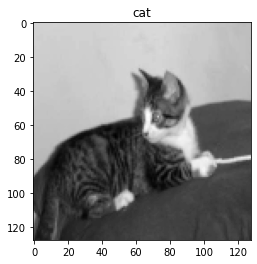

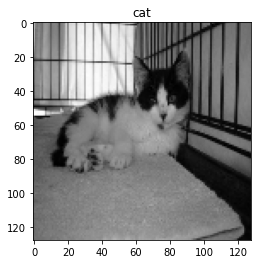

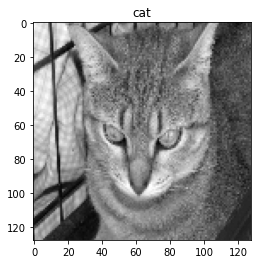

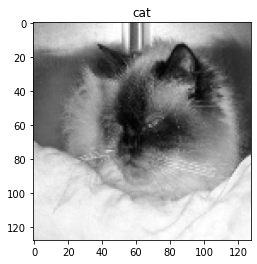

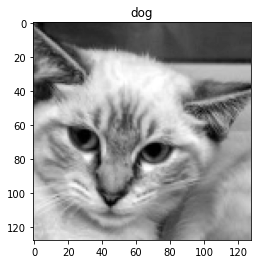

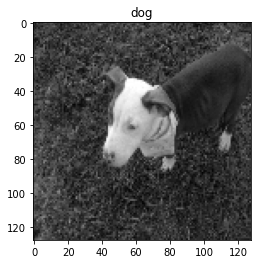

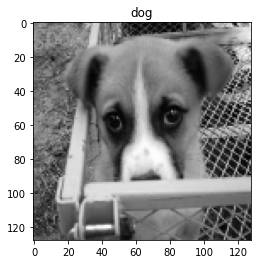

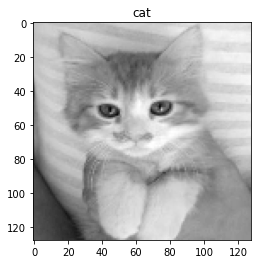

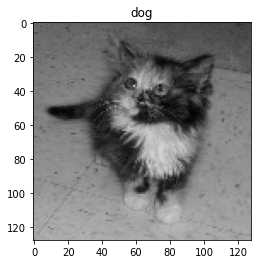

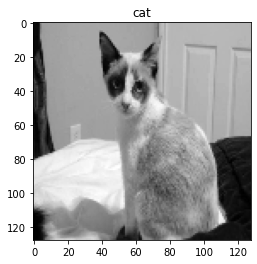

In [19]:
for i in range(20):
    if prediction[i] >= 0.5:
        class_name = 'dog'
    else:
        class_name = 'cat'
        
    plt.imshow(x_test[i] , cmap = "gray")
    plt.title(class_name)
    plt.show()   